DataSet

In [14]:
from google.colab import files
!zip -r cifar10_images.zip cifar10_images
files.download("cifar10_images.zip")


Streaming output truncated to the last 5000 lines.
updating: cifar10_images/deer/train_28711.png (stored 0%)
updating: cifar10_images/deer/train_21191.png (stored 0%)
updating: cifar10_images/deer/train_5625.png (stored 0%)
updating: cifar10_images/deer/train_32867.png (stored 0%)
updating: cifar10_images/deer/train_43391.png (stored 0%)
updating: cifar10_images/deer/train_24861.png (stored 0%)
updating: cifar10_images/deer/train_19584.png (stored 0%)
updating: cifar10_images/deer/train_18434.png (stored 0%)
updating: cifar10_images/deer/train_27100.png (stored 0%)
updating: cifar10_images/deer/train_41286.png (stored 0%)
updating: cifar10_images/deer/train_42769.png (stored 0%)
updating: cifar10_images/deer/train_43914.png (stored 0%)
updating: cifar10_images/deer/train_25954.png (stored 0%)
updating: cifar10_images/deer/train_43975.png (stored 0%)
updating: cifar10_images/deer/train_2787.png (stored 0%)
updating: cifar10_images/deer/train_25992.png (stored 0%)
updating: cifar10_image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train 1 with NO SAVE

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3576 - loss: 1.7359 - val_accuracy: 0.5195 - val_loss: 1.3727
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5865 - loss: 1.1687 - val_accuracy: 0.6303 - val_loss: 1.0499
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6497 - loss: 0.9958 - val_accuracy: 0.6616 - val_loss: 0.9810
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6902 - loss: 0.8866 - val_accuracy: 0.6774 - val_loss: 0.9297
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7157 - loss: 0.8170 - val_accuracy: 0.6927 - val_loss: 0.8934
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7400 - loss: 0.7462 - val_accuracy: 0.6754 - val_loss: 0.9467
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7602 - loss: 0.6893 - val_accuracy: 0.6828 - val_loss: 0.9289
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7762 - loss: 0.6449 -

Train 2 with SAVE

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from PIL import Image

# =========================
# 1. Load & Preprocess Data
# =========================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# =========================
# 2. Define Class Labels
# =========================
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# =========================
# 3. Save CIFAR-10 Images into Folders
# =========================
output_dir = "cifar10_images"
os.makedirs(output_dir, exist_ok=True)

for i, label in enumerate(np.squeeze(y_train.argmax(axis=1))):
    class_name = class_names[label]
    class_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    img = Image.fromarray((x_train[i] * 255).astype('uint8'))
    img.save(os.path.join(class_dir, f"train_{i}.png"))

print(f"✅ Saved CIFAR-10 images into folders at: {os.path.abspath(output_dir)}")

# =========================
# 4. Build Model
# =========================
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# =========================
# 5. Compile & Train
# =========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# =========================
# 6. Evaluate Model
# =========================
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# =========================
# 7. Save Model
# =========================
model.save("cifar10_model.h5")
print("✅ Model saved as cifar10_model.h5")


✅ Saved CIFAR-10 images into folders at: /content/cifar10_images


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3430 - loss: 1.7602 - val_accuracy: 0.5266 - val_loss: 1.3182
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5727 - loss: 1.2065 - val_accuracy: 0.6140 - val_loss: 1.0910
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6362 - loss: 1.0287 - val_accuracy: 0.6233 - val_loss: 1.0664
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6755 - loss: 0.9282 - val_accuracy: 0.6745 - val_loss: 0.9292
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7058 - loss: 0.8436 - val_accuracy: 0.6663 - val_loss: 0.9752
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7253 - loss: 0.7939 - val_accuracy: 0.6866 - val_loss: 0.9185
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7377 - loss: 0.7477 - val_accuracy: 0.6788 - val_loss: 0.9458
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7475 - loss: 0.7078 -

Test accuracy: 0.7098
✅ Model saved as cifar10_model.h5


Auto Predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


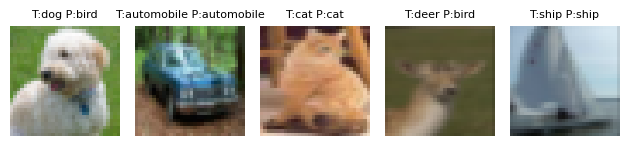

In [8]:
import matplotlib.pyplot as plt
import numpy as np
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
pred = model.predict(x_test)
for i in range(5):
    idx = np.random.randint(len(x_test)); plt.subplot(1,5,i+1); plt.imshow(x_test[idx]);
    plt.title(f'T:{class_names[np.argmax(y_test[idx])]} P:{class_names[np.argmax(pred[idx])]}', fontsize=8); plt.axis('off')
plt.tight_layout(); plt.show()

Manual Predict

Saving aeroplan-and-aircraft-vector.jpg to aeroplan-and-aircraft-vector.jpg

📸 Predicting for image: aeroplan-and-aircraft-vector.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
🔍 Prediction: airplane (88.06% confidence)


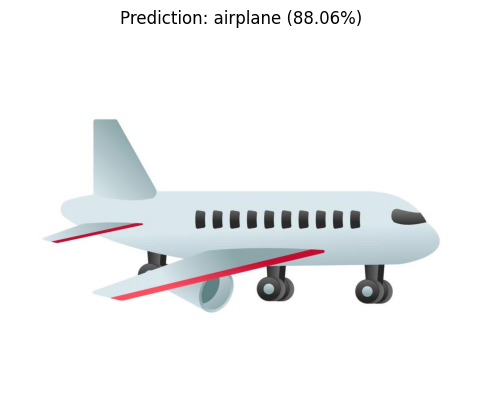

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# =========================
# 1. Load Model
# =========================
model = load_model("cifar10_model.h5")

# =========================
# 2. Class Names
# =========================
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# =========================
# 3. Function to Predict and Show Image
# =========================
def predict_image(img_path):
    img = Image.open(img_path)
    img_resized = img.resize((32, 32))
    img_array = np.array(img_resized) / 255.0

    # Handle grayscale or RGBA
    if img_array.ndim == 2:
        img_array = np.stack((img_array,)*3, axis=-1)
    elif img_array.shape[-1] == 4:
        img_array = img_array[..., :3]

    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = np.max(pred)

    # Print result
    print(f"🔍 Prediction: {class_names[class_idx]} ({confidence*100:.2f}% confidence)")

    # Display image with title
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[class_idx]} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# =========================
# 4. Upload Image
# =========================
uploaded = files.upload()

for img_name in uploaded.keys():
    print(f"\n📸 Predicting for image: {img_name}")
    predict_image(img_name)


Model Summary

In [3]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

Accuracy and Validation

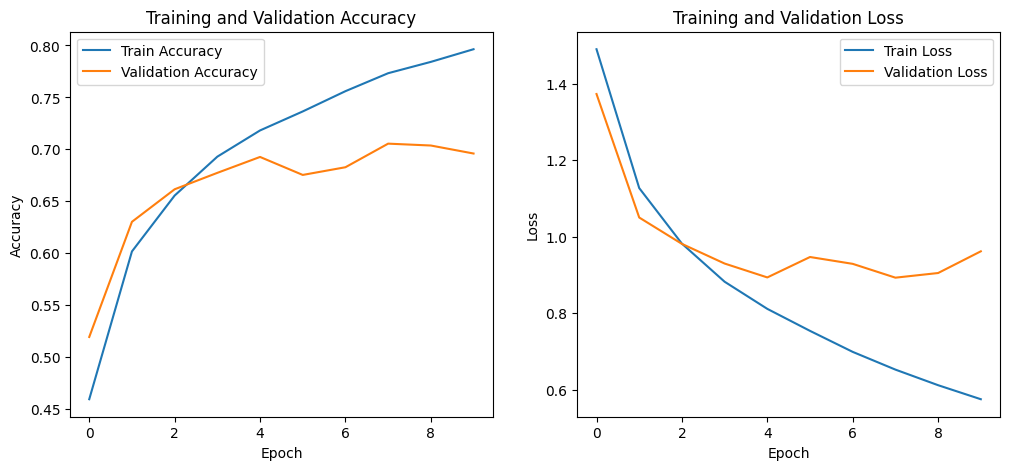

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


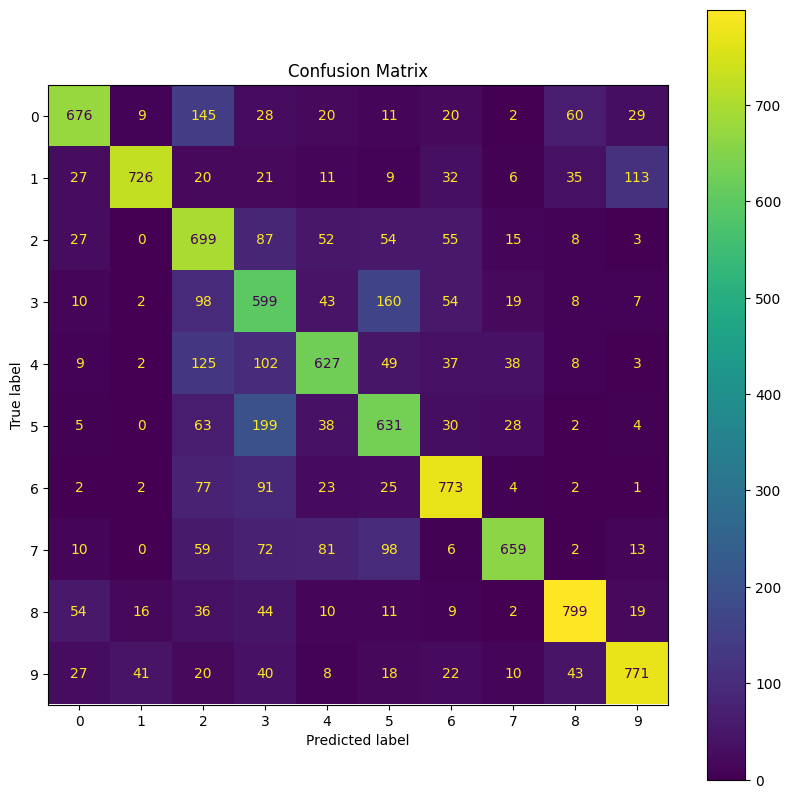

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict classes (run after model is trained)
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


ROC Curves

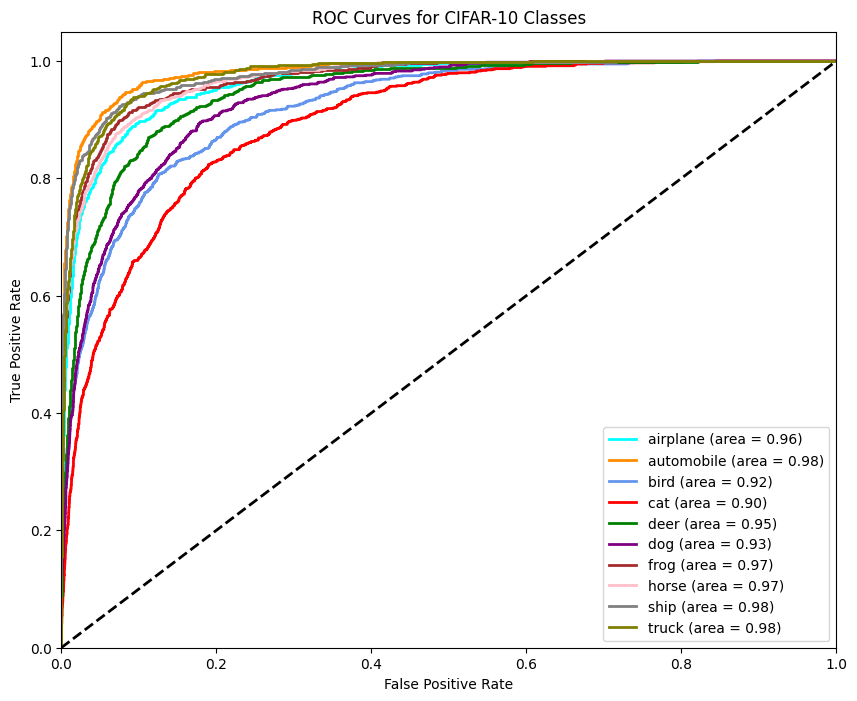

In [6]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import tensorflow as tf

if y_test.shape[-1] != 10:
    y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
else:
    y_test_cat = y_test

n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class names for CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green',
                'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CIFAR-10 Classes')
plt.legend(loc="lower right")
plt.show()
